# Horse Race Outcome Prediction - Data Science Project (by Kailash Nagasar)
1. Introduction 
In this notebook, I aim to develop a machine learning model to predict horse race outcomes based on race results and race details data. The process will involve data understanding, cleaning, feature engineerng, and finally model development (as well as evaluation and interpretation as per the instructions outlined in the 'Task.pdf' document.
 2. Data Understanding and ExploratiIon
We will begin by exploring the to wdataset erace_results.csv and race_details.csv, to understand their structure and the features hety contain.  [I renamed the provided .csv files (race_details_20240101_20240131 to race_details and race_results_20240101_20240131 to race_results) so that it is easier for me to interact wih tthem.)


In [1]:
# I realized that I want to keep this command in a standalone cell because later, 
# I will use it to import the cleaned .csv files

import pandas as pd

In [2]:
# Loading the .csv files followed by previewing the data

race_results = pd.read_csv('../data/race_results.csv')
race_details = pd.read_csv('../data/race_details.csv')

print(race_results.head())
print(race_details.head())

    race_date race_city  race_no  result      horse_name horse_accessories  \
0  2024-01-01     Bursa        1       1      MY REVERIE           KG K DB   
1  2024-01-01     Bursa        1       2     NOBLE WOMAN          KG DB SK   
2  2024-01-01     Bursa        1       3    ÇİSEM SULTAN      KG K DB SGKR   
3  2024-01-01     Bursa        1       4  OKYANUS GÜZELİ            SKG SK   
4  2024-01-01     Bursa        1       5   MOUNTAIN LION             DB SK   

  horse_age horse_sex                                       horse_origin  \
0        3y         f  BLUEGRASS CAT (USA)- LEGALLY INCLUDED (USA) / ...   
1        3y         f             SCARFACE- PROVIDENCE / SRI PEKAN (USA)   
2        3y         f  SMART ROBIN (JPN)- SNOOZY TIMES / ROYAL ABJAR ...   
3        3y         f           SIDNEY'S CANDY (USA)- NURSENA / SCARFACE   
4        3y         m     LION HEART (USA)- SAN MARINO / SRI PEKAN (USA)   

             horse_sire  ...        horse_owner   horse_trainer  \
0   BLU

In [3]:
# I go on to explore the shape of the data, the data types of each column 
# and lastly a statistical summary for the numeric columns

print(race_results.shape)
print(race_details.shape)

print(race_results.dtypes)
print(race_details.dtypes)

print(race_results.describe())
print(race_details.describe())

(4283, 24)
(480, 11)
race_date                 object
race_city                 object
race_no                    int64
result                     int64
horse_name                object
horse_accessories         object
horse_age                 object
horse_sex                 object
horse_origin              object
horse_sire                object
horse_dam                 object
hors_broodmare_sire       object
jockey_weight              int64
jockey_name               object
horse_owner               object
horse_trainer             object
horse_race_degree         object
horse_win_value          float64
horse_psf_rate             int64
horse_psf_rank             int64
Horse_starting_box_no      int64
horse_margin              object
horse_late_start          object
horse_rate                 int64
dtype: object
race_date               object
race_city               object
race_no                  int64
race_type               object
race_sex_group          object
race_age_group    

# Disclaimer

[I have decided to express my findings and thoughts related to the statistical analysis on hand, here, on this notebook rather than on the pdf documentation as means of ease of access for recruitment team so that we can follow a flow of my thought process on one medium - the documentation in the pdf will include details as to how I went about the process in my attempt to create this machine learning model. It will reference resources and will also include some findings and snippets from this notebook]

# My first checkpoint for exploring the data
After reviewing the preview of the data, the data types of the columns and the statistical summaries of the numerical fields... I start to already notice some 'inaccurate/unreliable' data. This may be the incorrect terminology, but allow me to expand on my findings. 

- The first thing that came to my attention from the preview of the data was that the horse_age field holds string values. I confirmed that when I reviewed the data type of the horse_age field. I felt and kept in mind that the age of the horse would be valuable data in terms of predicting the outcome of whether a horse could win in the future so I noted that I may need to transform this string field to an integer field later on in my analysis as the data is not useful in the format it is currently stored in.

- From the preview of the data, I also noticed that 'race_age_group' is also stored as string, however, I decided to reserve my judgement and NOT lean towards converting that to an integer data field as it may be considered a valuable categorical data field and felt that I could address it when I decide to encode the data fields later on for my training set.

- From the statistical summaries of the numerical fields, the only field that has my attention on my first review of the data is the jockey_weight field. I took note of the standard deviation, the mean, minimum and maximum values and the 75th percentile in particular. I feel that there may be outliers in these data values considering that 75% of the data falls within one standard deviation of the mean, but the maximum value falls further out more than TWO standard deviations of the mean? However, I don't have enough information at the current stage to make a decision. I am just taking notes for now.

- From the statistical summaries, I realized that the next field that I am curious about is the horse age field. Would this field have outliers? I have taken a decision to investigate how I can convert that field to a numerical field. We can see how I did this in the cells below.

- Lastly, my key take-away from may first review of the data is, I decided not to focus on trying to remove outliers from any of the other numerical fields such as (horse_rate, horse_psf_rate, etc.) as the OUTLIERS in those fields would represent the natural variation of the data, however, I feel that it is a fair decision to clean up the outliers in the jockey_weight and horse_age fields. (I understand that the outliers in these fields may also represent natural variations of the datasets, but, in my minimal experience - I am taking the decision to go ahead and explore removing the outliers.)

- I have decided to keep those data cleaning methods in mind and move on to the next part of my investigation/data exploration. Are there any missing data values? How will I address this? 

In [4]:
# Implemented methods to check for missing data in the fields of both datasets.

print(race_results.isnull().sum())
print(race_details.isnull().sum())

race_date                   0
race_city                   0
race_no                     0
result                      0
horse_name                  0
horse_accessories         114
horse_age                   0
horse_sex                   0
horse_origin                0
horse_sire                  0
horse_dam                   0
hors_broodmare_sire         0
jockey_weight               0
jockey_name                 0
horse_owner                 0
horse_trainer              25
horse_race_degree           0
horse_win_value             2
horse_psf_rate              0
horse_psf_rank              0
Horse_starting_box_no       0
horse_margin             2372
horse_late_start         3789
horse_rate                  0
dtype: int64
race_date               0
race_city               0
race_no                 0
race_type               0
race_sex_group          0
race_age_group          0
race_race_group         0
race_length             0
race_track_type         0
race_track_condition    0
best_ra

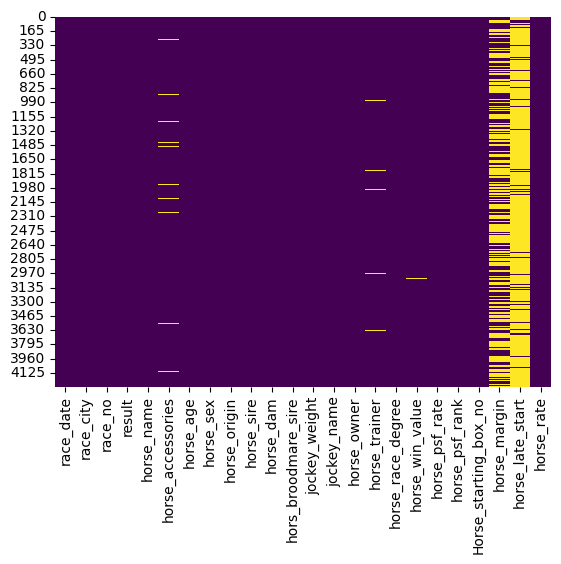

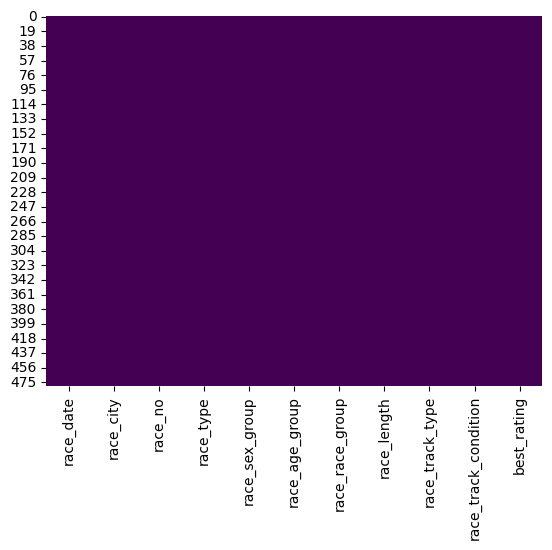

In [5]:
# I wanted to visualize the missing data

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(race_results.isnull(), cbar=False, cmap='viridis')
plt.show()
sns.heatmap(race_details.isnull(), cbar=False, cmap='viridis')
plt.show()

# My second checkpoint for exploring the data
In the above 2 cells, I dived deeper into exploring and visualising missing data values in the datasets. 

- I found that race_results dataset contains fields with missing values and the race_details dataset does not have any missing values.

- The horse_margin field has 2372 missing data values and the horse_late_start field has 3789 missing data values (MORE than 50% of the records contained in the original dataset). From my data sciences shortcourse content and my resources from google (documented in the pdf) I have decided that the best decision is to 'drop' these data fields and not include them in my data analysis.

- The horse_accessories field is missing 114 data values, the horse_trainer field is missing 25 data values and the horse_win_value field is missing 2 data values. Since the amount of these missing values are minimal in comparison to the size of the dataset and since I feel that these data fields are significant in relation to predictions produced by the model I am training, I have decided to retain these data fields. 

- In the cell below, I went on to explore the 'kind' of data (specific data values with their frequency) in each of the fields so that I have an informed decision of the data I am omitting from the dataset as well as the data I want to impute into the dataset.

- I then went further to investigate the (kind of data/the format as to how data is stored) in the horse_age field so that I can determine how to convert the field from string to integer.
- I wanted to explore the frequency of the unique data values within the jockey_weight field so I could see if I could manually determine any outliers.
- I wanted to take note of what seems like a categorical data field, race_age_group to see whether I will stand by my decision to transform that field by means of encoding.
- LAST but not LEAST, I wanted to explore the race_sex_group field because only after reviewing the preview of the datasets MULTIPLE times (I did not see this at first glance), I realized that there is a possibility that race_sex_group may be a redundant field. I will confirm this 'allegation' after running the next block of code.  

In [6]:
# Prints the unique values within the data fields (data to be omitted and imputed)

print(race_results['horse_margin'].value_counts())
print(race_results['horse_late_start'].value_counts())
print(race_results['horse_accessories'].value_counts())
print(race_results['horse_trainer'].value_counts())

# I investigated fields further as explained above
print(race_results['horse_age'].value_counts())
print(race_results['jockey_weight'].value_counts())
print(race_details['race_age_group'].value_counts())
print(race_details['race_sex_group'].value_counts())

horse_margin
1,5 Lengths     203
Half Lengths    202
1 Lengths       177
2 Lengths       148
3 Lengths       135
2,5 Lengths     124
Lengthsun       111
4 Lengths       101
3,5 Lengths      90
Nose             83
Head             69
5 Lengths        68
4,5 Lengths      66
6 Lengths        47
7 Lengths        34
5,5 Lengths      28
6,5 Lengths      25
9 Lengths        24
7,5 Lengths      23
8,5 Lengths      22
8 Lengths        21
10 Lengths       15
11 Lengths       15
9,5 Lengths      14
13 Lengths       11
12 Lengths        9
15 Lengths        7
17 Lengths        5
14 Lengths        4
20 Lengths        4
19 Lengths        4
45 Lengths        4
16 Lengths        3
21 Lengths        3
25 Lengths        2
35 Lengths        2
18 Lengths        2
28 Lengths        1
26 Lengths        1
27 Lengths        1
50 Lengths        1
Horsehead         1
40 Lengths        1
Name: count, dtype: int64
horse_late_start
2 Lengths       121
3 Lengths        76
1 Lengths        75
4 Lengths        38
5 Le

# Key Take-Aways
After analyzing the kind of data values the data sets contain, I ended up taking these decisions: 

- Since the horse_accessories and horse_trainer fields are string values, I will impute the missing data fields in these 2 columns with 'Unknown'.

- Since horse_win_value is a float field, I will impute the missing data fields with its mean.

- The horse_age field is a string field stored in the format (integer age + string 'y') example '3y' represents 3 years old. I decided to go ahead and convert this field to an integer field by removing the string element 'y'.

- In the jockey_weight field, I feel like I can manually see some outliers in the data, so I decided that I will implement a box plot for the jockey_weight field and the newly converted numerical horse_age field so I can see the outliers for both these features of the data and I will then remove the outliers by the IQR method.

- race_age_group is indeed a categorical field with 3 unique values. I stand by my decision to encode it when I transform my data into the training set.

- I feel that I can confirm that race_sex_group is a redundant field considering that we already have the genders for all the horses that won races in the race_results dataset. The race_sex_group contains only 2 unique data values, 'female' which indicates that it is a 'Maiden' only horse race (only female horses can partake.. this is determined by the race_type data field), and 'Undefined' which refers to every other race type, which may include both male and female horses, from my understanding. I therefore decided to 'drop' and thus omit this feature from the dataset as I feel it is redundant. 

In [7]:
# Dropping fields that are missing too many data values, and a field that I feel is redundant.

race_results.drop(columns=['horse_late_start'], inplace=True)
race_results.drop(columns=['horse_margin'], inplace=True)

race_details.drop(columns=['race_sex_group'], inplace=True)

In [8]:
# Imputing the missing data fields of features that I chose to retain in the model by means explained in the aforementioned

race_results['horse_win_value'] = race_results['horse_win_value'].fillna(race_results['horse_win_value'].mean())

race_results['horse_accessories'] = race_results['horse_accessories'].fillna('Unknown')
race_results['horse_trainer'] = race_results['horse_trainer'].fillna('Unknown')

In [9]:
# Removing the 'y' from the horse_age field, converting the field to integer and verifying the result

race_results['horse_age'] = race_results['horse_age'].str.replace('y', '').astype(int)
print(race_results[['horse_age']].head())

   horse_age
0          3
1          3
2          3
3          3
4          3


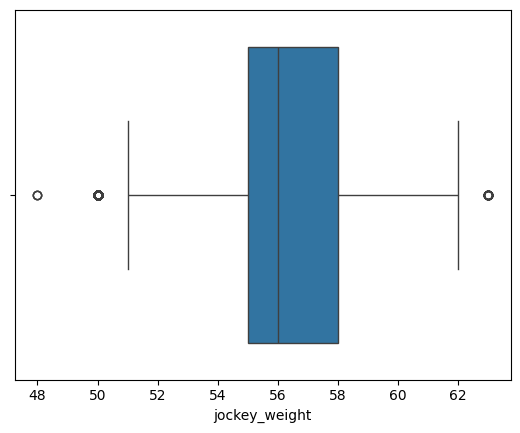

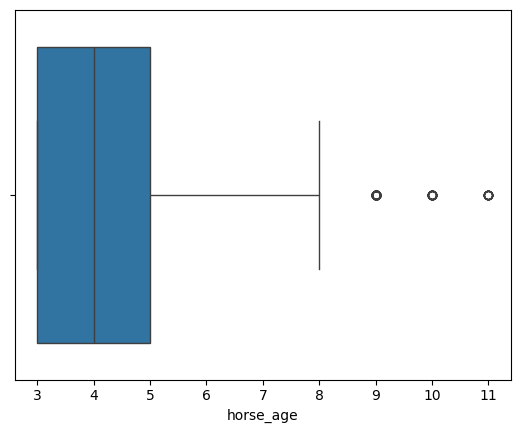

In [10]:
# Boxplot for jockey_weight and horse_age to visualize outliers

sns.boxplot(x=race_results['jockey_weight'])
plt.show()

sns.boxplot(x=race_results['horse_age'])
plt.show()

In [11]:
# Removing the outliers observed in the jockey_weight and horse_age fields by the IQR method, as explained above

Q1 = race_results['jockey_weight'].quantile(0.25)
Q3 = race_results['jockey_weight'].quantile(0.75)
IQR = Q3 - Q1
race_results = race_results[~((race_results['jockey_weight'] < (Q1 - 1.5 * IQR)) | (race_results['jockey_weight'] > (Q3 + 1.5 * IQR)))]

Q1 = race_results['horse_age'].quantile(0.25)
Q3 = race_results['horse_age'].quantile(0.75)
IQR = Q3 - Q1
race_results = race_results[~((race_results['horse_age'] < (Q1 - 1.5 * IQR)) | (race_results['horse_age'] > (Q3 + 1.5 * IQR)))]

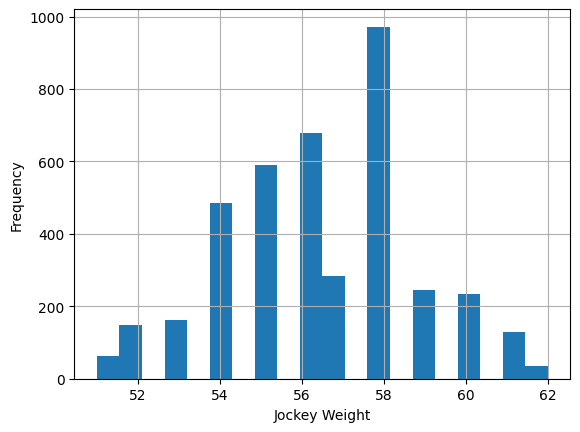

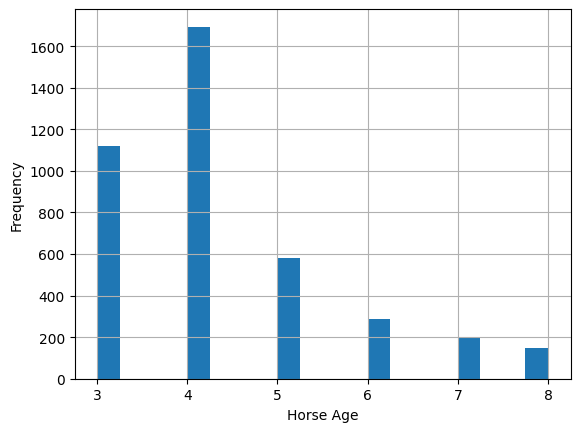

In [12]:
# Visualising a histogram without outliers for the jockey_weight and horse_age features 
# (alternatively I could have also just re-run the boxplot cell code to visualize the change)

race_results['jockey_weight'].hist(bins=20)
plt.xlabel('Jockey Weight')
plt.ylabel('Frequency')
plt.show()

race_results['horse_age'].hist(bins=20)
plt.xlabel('Horse Age')
plt.ylabel('Frequency')
plt.show()

# Summing up my Data Understanding & Cleaning portion of the task 
At this point, I am relatively happy with the decisions I have chosen to make and I feel confident about my approach towards developing my machine learning model. I will now export the current state of the datasets to new, cleaned, secondary storage .csv files which I will then merge into a combined data set for the second part of the project, Feature Engineering. 
In my documentation, I point to resources that helped me understand and implement this part of the project. 

In [13]:
# Saving cleaned data to new CSV files so I dont need to re-run all the previous cells of code for the
# future development of the machine learning model. (My data understanding and data cleaning component of this project is complete)

race_results.to_csv('../data/race_results_cleaned.csv', index=False)
race_details.to_csv('../data/race_details_cleaned.csv', index=False)

print("Cleaned data saved!")

Cleaned data saved!


In [14]:
# Loadin the new cleaned data CSV Files to the same variables, race_results & race_details

race_results = pd.read_csv('../data/race_results_cleaned.csv')
race_details = pd.read_csv('../data/race_details_cleaned.csv')

In [15]:
# Merge the datasets on race_date, race_city, and race_no (primary/secondary keys in both datasets) 
# and printing the shape of the new merged dataset to ensure that the record count without outliers is consistent

merged_data = pd.merge(race_results, race_details, on=['race_date', 'race_city', 'race_no'], how='inner')
print(merged_data.shape)

# I dropped columns that I felt were not useful for prediction

merged_data = merged_data.drop(columns=['horse_sire', 'horse_dam', 'hors_broodmare_sire', 'horse_owner', 'horse_race_degree', 'best_rating'])
print(merged_data.head())

(4025, 29)
    race_date race_city  race_no  result      horse_name horse_accessories  \
0  2024-01-01     Bursa        1       1      MY REVERIE           KG K DB   
1  2024-01-01     Bursa        1       2     NOBLE WOMAN          KG DB SK   
2  2024-01-01     Bursa        1       3    ÇİSEM SULTAN      KG K DB SGKR   
3  2024-01-01     Bursa        1       4  OKYANUS GÜZELİ            SKG SK   
4  2024-01-01     Bursa        1       5   MOUNTAIN LION             DB SK   

   horse_age horse_sex                                       horse_origin  \
0          3         f  BLUEGRASS CAT (USA)- LEGALLY INCLUDED (USA) / ...   
1          3         f             SCARFACE- PROVIDENCE / SRI PEKAN (USA)   
2          3         f  SMART ROBIN (JPN)- SNOOZY TIMES / ROYAL ABJAR ...   
3          3         f           SIDNEY'S CANDY (USA)- NURSENA / SCARFACE   
4          3         m     LION HEART (USA)- SAN MARINO / SRI PEKAN (USA)   

   jockey_weight  ... horse_psf_rate horse_psf_rank  Hors

# Reasoning for dropping of data fields

Initially, I dropped the fields horse_sire, horse_dam, hors_broodmare_sire & horse_owner as I felt that these fields would not be useful or significant when it related to making predictions (I felt that horse_owner is insignificant, but horse_trainer may contribute towards a horse winning - so I retained that feature). 
However, much later when I was trying to fit my RandomForestClasifier model, I encountered an error as I forgot to account for encoding a few of the remaining object (string) features of the dataset. After reviewing, I decided to come back up to this cell to encode and include some features and DROP two more additional features from the dataset, these features can be seen above as horse_race_degree & best_rating. I felt that these features should not have been included since I already included 13 OBJECT features for encoding for my machine learning model, at this point of time. 

# Encoding my data and preparing it for modeling
Some of the shortcourse content that I have exposed myself to was sufficient to get me through this part of the task, but I was a little unsure of the decisions I wanted to make, so to supplement my understanding so that I could make an informed decision, I referred to some additional resources which I have referenced in the documentation pdf.

- I used one-hot encoding for the non-ordinal, categorical data.
race_date (time of year), race_city (location), horse_sex (gender), race_type (advantages/disadvantages), race_age_group (experience of horse/experience of opponent horses), race_track_type & race_track_condition (conditions of the track) could be all be POTENTIALLY significant predictors in the machine learning model.
  
- I used label encoding for the ordinal or high cardinality data.
jockey_name was included because a jockey may be experienced and could contribute to the predictions, I didnt want to exclude the horse_name field so I encoded it, however, I felt like it may not be a significant prediction feature - the same goes for the race_race_group feature. Features like horse_origin (where the horse is from), horse_trainer (who trained the horse), horse_accessories (accessories applied to the horse), are significant features that I felt contribute towards the predictions of the machine learning model so I decided to include and encode them.

- I also noticed that choosing not to drop the horse_name feature will aid to my advantage towards the end of my feature engineering component.

In [16]:
# Using the pd.get_dummies() method for one-hot encoding

merged_data = pd.get_dummies(merged_data, columns=['race_date', 'race_city', 'horse_sex', 'race_type', 'race_age_group', 'race_track_type', 'race_track_condition'], drop_first=True)

In [17]:
# Label encoding for oridinal/high-cardinality features

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
merged_data['jockey_name'] = label_encoder.fit_transform(merged_data['jockey_name'])
merged_data['horse_origin'] = label_encoder.fit_transform(merged_data['horse_origin'])
merged_data['horse_trainer'] = label_encoder.fit_transform(merged_data['horse_trainer'])
merged_data['horse_accessories'] = label_encoder.fit_transform(merged_data['horse_accessories'])

merged_data['horse_name'] = label_encoder.fit_transform(merged_data['horse_name'])
merged_data['race_race_group'] = label_encoder.fit_transform(merged_data['race_race_group'])

# Summing up the end of the feature engineering component of the project

- Using some resources offered on google (I have referenced them) and considering the state of my 'cleaned' horse_age feature of the dataset, I was concerned that by removing the outliers I may have removed elements of the dataset that could have represented the natural variability of the dataset, but nevertheless, I choose to stick by my decision considering the fact that the information I found from the internet, indicates that a horse may be regarded to be in it's prime after 2 years of experience, and that is how I derived an age_category for the age of the horse. I also had to one-hot encode this categorical data as it was not numerical.

- I went further to feature engineer a jockey_experience feature by determining a jockey's experience level by counting the amount of races they have participated in.

- Assuming that horse_rate refers to the overall rating of the horse's previous performances, or the current 'form' of the horse, I feature engineered an average_horse_rate feature for each horse based on a transformation of the mean.
  
I feel that these 3 features are valuable in terms of their contribution towards predictions in the machine learning model.

In [18]:
# Defining age categories by means of a function and then applying it to the dataset

def age_category(age):
    if age <= 3:
        return 'Young'
    elif 4 <= age <= 6:
        return 'Prime'
    else:
        return 'Experienced'

merged_data['horse_age_category'] = merged_data['horse_age'].apply(age_category)

# I had to one-hot encode the age category (not numerical)

merged_data = pd.get_dummies(merged_data, columns=['horse_age_category'], drop_first=True)

In [19]:
# Deriving the jockey_experience feature by counting the number of races they have been in and then verifying by previewing dataset

merged_data['jockey_experience'] = merged_data.groupby('jockey_name')['jockey_name'].transform('count')
print(merged_data.head())

   race_no  result  horse_name  horse_accessories  horse_age  horse_origin  \
0        1       1        1484                 38          3           285   
1        1       2        1544                 30          3          1614   
2        1       3        2289                 40          3          1700   
3        1       4        1577                 57          3          1654   
4        1       5        1438                  2          3          1180   

   jockey_weight  jockey_name  horse_trainer  horse_win_value  ...  \
0             56          158            365             1.50  ...   
1             58          135            378             3.75  ...   
2             56          150            188            28.70  ...   
3             56          139             27            14.85  ...   
4             57           20            258             4.55  ...   

   race_type_Sale 3  race_age_group_4 Years Old  \
0             False                       False   
1       

In [20]:
# Calculating a horse's average rate across races by grouping horse_name & horse_rate field and calculating a horse-specific mean

merged_data['avg_horse_rate'] = merged_data.groupby('horse_name')['horse_rate'].transform('mean')

In [21]:
# Ensuring that there are no missing values before I proceed to select my model and train the dataset.

print(merged_data.isnull().sum())

race_no                     0
result                      0
horse_name                  0
horse_accessories           0
horse_age                   0
                           ..
race_track_condition_Wet    0
horse_age_category_Prime    0
horse_age_category_Young    0
jockey_experience           0
avg_horse_rate              0
Length: 82, dtype: int64


# Concluding the feature engineering component of my project (my shortfall)
While doing some research as I was completing this component of the project, I found that data scientists tend to 'preprocess' data as a means of preparing it for modeling. I have gone as far as checking to make sure that there are no missing data values across my features that I have included in the dataset, however, I noticed that some/most data scientists implement 'Scaling'. I did not have much experience/exposure on this front so I was unsure of how to go about implementing it and due to time constraints (as I had to move on to learning about what model would be best for me and choosing a machine learning model to develop upon) I thus chose to OMIT the 'Scaling' component of preprocessing my data/ensuring data integrity.  

# Part 3: Model Selection & Training
For this part onwards in this project, I found myself leaning more towards online resources/research and YouTube tutorials which I have referenced. This is due to the lack of my practical experience in the light of developing machine learning models. From my research I found that the best fitting model is the random forest model so I dug deeper into that and implemented it for my data set. 
I started by splitting my data into the standard 80% training set and 20% testing set while ASSUMING that the 'result' feature/data field from my dataset relates to the outcome column.
I then trained the model.

In [22]:
# Defining feature matrix (X) and target variable (y) and as explained above, I assumed 'result' is the outcome

from sklearn.model_selection import train_test_split

X = merged_data.drop(columns=['result']) 
y = merged_data['result']

# I split the data into training set (80%) and testing set (20%) followed by printing the shape of my feature matrix (X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(3220, 81) (805, 81)


In [23]:
# Initializing the model and then training it

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Part 4: Model Evaluation

After I fitted the model, it was now time to evaluate the model as per the instructions outlined in the task.pdf
I found it pretty simple to grasp the concept and implement the predicting on the test set as well as printing the accuracy score and classificiation report as these were relatively simple packages to import and implement.

## My Shortfall in part 4
I found some difficulty in trying to determine whether I should implement the ROC-AUC evaluation metric on my Random Forest Classifier model, and some methods of implementation that I had found seemed a little daunting to begin to grasp, so again, due to time constraints I decided to omit this evaluation metric from my machine learning model and did not wander down the path of trying to understand how to implement it in my project.

In [24]:
# Predicting on the test set followed by evaluating the model by means of printing the accuracy score & classification report

y_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
#print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.13664596273291926
              precision    recall  f1-score   support

           1       0.25      0.37      0.30        92
           2       0.12      0.11      0.12        87
           3       0.09      0.09      0.09        94
           4       0.13      0.14      0.13        86
           5       0.09      0.12      0.10        90
           6       0.10      0.12      0.11        78
           7       0.11      0.07      0.09        84
           8       0.17      0.18      0.18        60
           9       0.17      0.15      0.16        41
          10       0.13      0.08      0.10        36
          11       0.00      0.00      0.00        22
          12       0.00      0.00      0.00        17
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00        

# Concluding Part 4: 

- I found that my model predicts at an a low accuracy of 13,6%. However, I feel that it is a (fair) first attempt at a practical task of building a machine learning model and I am grateful for the exposure I received and the knowledge I have gained over the course of this weekend.

- In my classification report, since, for some labels in my dataset, my model did not make any predictions - I had to include the zero_division parameter.

- I feel that some reasons for my model's low accuracy could relate to the variability in my classes/features (perhaps this could relate to the scalability data preprocessin method that I omitted).
I feel that perhaps I may have included too many features in my model for training and therefore perhaps my model is having a difficult time trying to find patterns or trends amongst the outcomes.
Maybe, I could have also chosen the incorrect machine learning model to implement on my dataset.

- I have tried to increase the accuracy of my model by hyperparameter tuning by means of implementing a Grid Search which can be seen implemented below. I have referenced how I was able to understand and implement the Grid Search in my documentation pdf.

- The Grid search does take a few minutes to complete on my local machine. I found that the Grid Search yielded a 'Best Accuracy Score' of 15,65% which is an increase in my model's accuracy but not by much. My key take-away is that, although my model still makes predictions - my model still struggles to make (accurate) predictions and the reason for this may relate to the list of reasons I have discussed above. 

In [25]:
from sklearn.model_selection import GridSearchCV

# The hyperparameter grid

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# I implemented a Grid Search with cross-validation

grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Outputting the best parameters and best score

print("Best parameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best accuracy score:  0.15652379406954633


# Part 5: Result Interpretation
In the 2 cells below, I extracted and visualized the features that my model recognized as important or significant when it regarded the matter of predictions. 

- I notice that horse_win_value seems to be most significant in terms of my model's predictions (0.07) and this may make sense as it directly relates to the performance of the horse.
- Features like horse_name, horse_origin & horse_trainer also seem to make sense as the identity of the horse and the trainer of the horse will contribute the performance of the horse.
- In terms of jockey_name, I am thinking that the experience of the jockey may play a role in this regard so thus I feel that these are all valid parameters that can contribute towards predicting the outcome of the races.

- My take-away is that I cannot be certain that these features will be the holy-grail in terms of making predictions ESPECIALLY if we consider the rated accuracy of my model, however, by intuition, they seem to make sense. :) 

In [26]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)
print(feature_importance)

                  feature  importance
8         horse_win_value    0.071188
1              horse_name    0.056413
4            horse_origin    0.055405
7           horse_trainer    0.054376
6             jockey_name    0.052744
..                    ...         ...
69       race_type_Sale 2    0.000671
57  race_type_Condition-7    0.000348
60          race_type_G 3    0.000294
70       race_type_Sale 3    0.000110
59  race_type_Condition-9    0.000028

[81 rows x 2 columns]


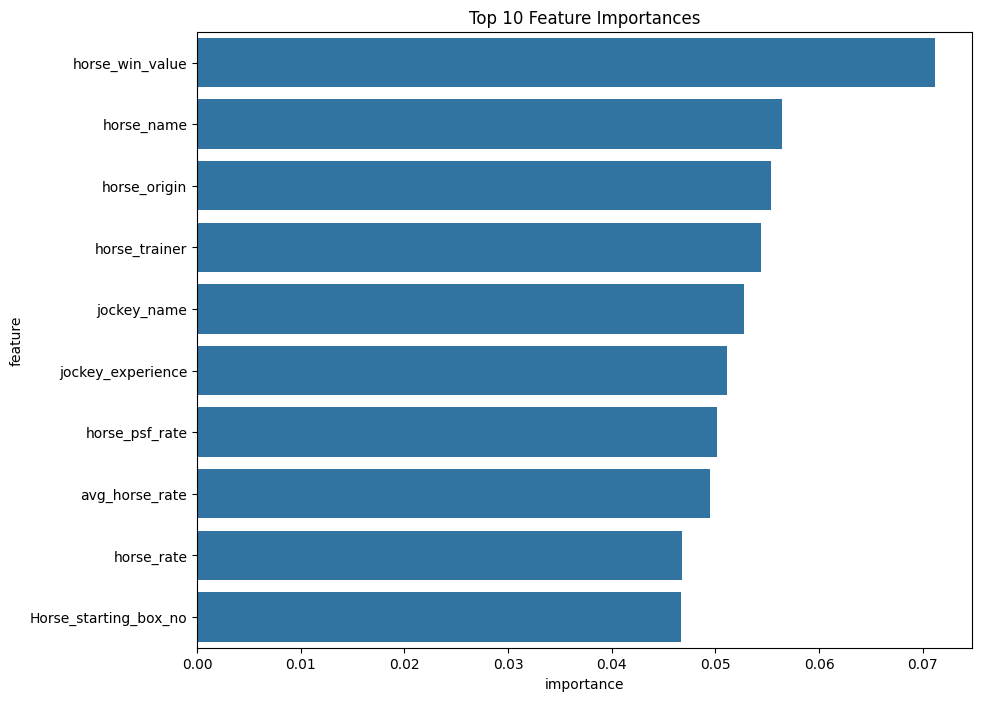

In [27]:
# Visualizing feature importances (Top 10 features)

plt.figure(figsize=(10, 8))
importance_df = feature_importance.head(10)  
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Top 10 Feature Importances')
plt.show()

# Part 6: Documentation & Visualization
For this part of the project - in accordance to the instructions in the task.pdf, since I did not implement ROC curves into my data analysis, I decided to learn about the confusion matrix, familiarize myself with it, and implement it into my project. (I have referenced my resources) 

- I found that, for the first class my model accurately predicted 34 values. As we went on to other classes that value (amount of correctly predicted values) decreased. As we got to the 10th class (of 17 classes) the amount of correctly predicted values is 3. After the 10th class, the model was unable to correctly predict any values for the remaining 7 classes.

- I notice that since there are many non zero values close together in the first few classes in the off-diagonal rows, there may be some confusion experienced by the model when it relates or tries to determine or find trends in the dataset and this may related to the similarities amongst the classes in the dataset.

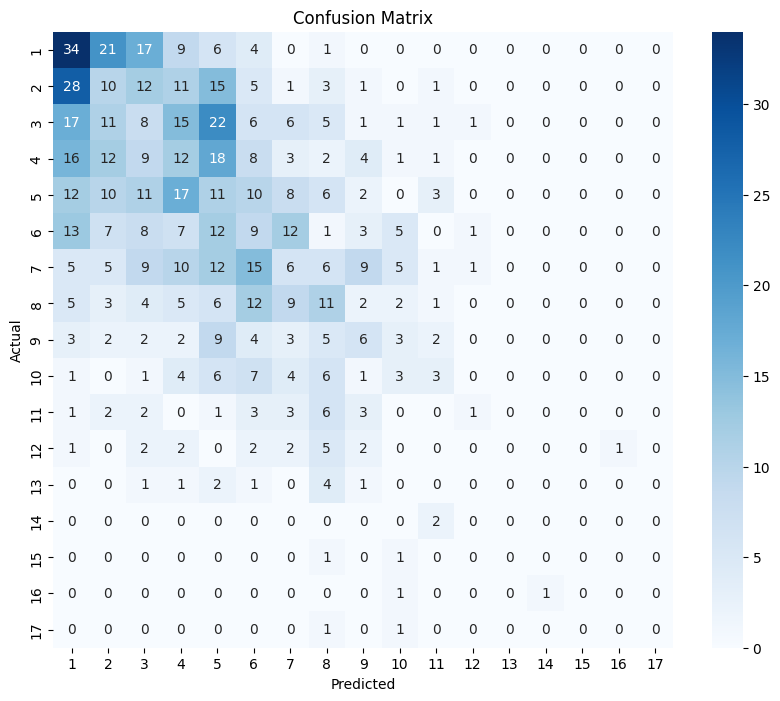

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the confusion matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 18), yticklabels=range(1, 18))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Ending Notes 

As I conclude this project, I am deeply grateful for the valuable learning experience it has provided me with. This journey has truly opened my mind to the incredible possibilities that emerge when we combine computers and data. I've gained a deeper understanding of data science, from cleaning datasets to training models... and every step has expanded my knowledge.

Although there were challenges along the way, each hurdle contributed to my growth. This project has revealed the beauty and potential that come from combining the power of technology and data, and I am eager to continue learning and exploring this exciting field further.